In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Set2")

from wordcloud import WordCloud

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# DATASET LOADING

In [2]:
import cv2
import numpy as np
import mediapipe as mp
from keras.models import load_model

# Load the pre-trained model and label
model = load_model("C:/Users/HP/Desktop/liveEmoji-main/model.h5")
label = np.load("C:/Users/HP/Desktop/liveEmoji-main/labels.npy")

# Initialize MediaPipe holistic and drawing utilities
holistic = mp.solutions.holistic
hands = mp.solutions.hands
holis = holistic.Holistic()
drawing = mp.solutions.drawing_utils


# Function to process a frame and predict emotion
def process_frame(frame):
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = holis.process(frame_rgb)

    landmarks = []

    if result.face_landmarks:
        for i in result.face_landmarks.landmark:
            landmarks.append(i.x - result.face_landmarks.landmark[1].x)
            landmarks.append(i.y - result.face_landmarks.landmark[1].y)

        if result.left_hand_landmarks:
            for i in result.left_hand_landmarks.landmark:
                landmarks.append(i.x - result.left_hand_landmarks.landmark[8].x)
                landmarks.append(i.y - result.left_hand_landmarks.landmark[8].y)
        else:
            landmarks.extend([0.0] * 42)

        if result.right_hand_landmarks:
            for i in result.right_hand_landmarks.landmark:
                landmarks.append(i.x - result.right_hand_landmarks.landmark[8].x)
                landmarks.append(i.y - result.right_hand_landmarks.landmark[8].y)
        else:
            landmarks.extend([0.0] * 42)

        landmarks = np.array(landmarks).reshape(1, -1)
        prediction = label[np.argmax(model.predict(landmarks))]

        return prediction
    return None


# OpenCV video capture
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

emotion = ""

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = cv2.flip(frame, 1)
    detected_emotion = process_frame(frame)

    if detected_emotion:
        emotion = detected_emotion
        cv2.putText(frame, emotion, (50, 50), cv2.FONT_ITALIC, 1, (255, 0, 0), 2)

    cv2.imshow("Emotion Recognition", frame)

    # Exit on 'e' key press
    if cv2.waitKey(1) & 0xFF == ord("e"):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()

# Print the detected emotion
print(f"Detected Emotion: {emotion}")
if emotion=="happy":
    dat = pd.read_csv('C:\\Users\\HP\\Desktop\\song-rec\\data\\Happy.csv')
    dat_artist = pd.read_csv('C:\\Users\\HP\\Desktop\\song-rec\\\data\\data_by_artist.csv')
    dat_genres = pd.read_csv('C:\\Users\\HP\\Desktop\\song-rec\\data\\data_by_genres.csv')
    dat_year = pd.read_csv('C:\\Users\\HP\\Desktop\\song-rec\\data\\data_by_year.csv')
    
elif emotion=="sad":
    dat = pd.read_csv('C:\\Users\\HP\\Desktop\\song-rec\\data\\Sad.csv')
    dat_artist = pd.read_csv('C:\\Users\\HP\\Desktop\\song-rec\\\data\\data_by_artist.csv')
    dat_genres = pd.read_csv('C:\\Users\\HP\\Desktop\\song-rec\\data\\data_by_genres.csv')
    dat_year = pd.read_csv('C:\\Users\\HP\\Desktop\\song-rec\\data\\data_by_year.csv')
    
elif emotion=="calm":
    dat = pd.read_csv('C:\\Users\\HP\\Desktop\\song-rec\\data\\Calm.csv')
    dat_artist = pd.read_csv('C:\\Users\\HP\\Desktop\\song-rec\\\data\\data_by_artist.csv')
    dat_genres = pd.read_csv('C:\\Users\\HP\\Desktop\\song-rec\\data\\data_by_genres.csv')
    dat_year = pd.read_csv('C:\\Users\\HP\\Desktop\\song-rec\\data\\data_by_year.csv')

elif emotion=="angry":
    dat = pd.read_csv('C:\\Users\\HP\\Desktop\\song-rec\\data\\Angry.csv')
    dat_artist = pd.read_csv('C:\\Users\\HP\\Desktop\\song-rec\\\data\\data_by_artist.csv')
    dat_genres = pd.read_csv('C:\\Users\\HP\\Desktop\\song-rec\\data\\data_by_genres.csv')
    dat_year = pd.read_csv('C:\\Users\\HP\\Desktop\\song-rec\\data\\data_by_year.csv')

else:
    print("Emotion Invalid")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


C:\Users\Deshmukh\anaconda3\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

In [3]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54287 entries, 0 to 54286
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valence           54287 non-null  float64
 1   year              54287 non-null  int64  
 2   acousticness      54287 non-null  float64
 3   artists           54287 non-null  object 
 4   danceability      54287 non-null  float64
 5   duration_ms       54287 non-null  int64  
 6   energy            54287 non-null  float64
 7   explicit          54287 non-null  int64  
 8   id                54287 non-null  object 
 9   instrumentalness  54287 non-null  float64
 10  key               54287 non-null  int64  
 11  liveness          54287 non-null  float64
 12  loudness          54287 non-null  float64
 13  mode              54287 non-null  int64  
 14  name              54287 non-null  object 
 15  popularity        54287 non-null  int64  
 16  release_date      54287 non-null  object

In [4]:
dat.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,54287.000000,54287.000000,54287.000000,54287.000000,5.428700e+04,54287.000000,54287.000000,54287.000000,54287.000000,54287.000000,54287.00000,54287.000000,54287.000000,54287.000000,54287.000000
mean,0.751275,1987.206845,0.262071,0.615538,2.275969e+05,0.722611,0.101940,0.080008,5.338258,0.213375,-7.79634,0.695010,40.119458,0.082972,123.405829
std,0.139637,20.181494,0.274492,0.146015,8.413142e+04,0.133119,0.302572,0.215925,3.551816,0.184609,2.99284,0.460407,17.777835,0.090083,28.525074
min,0.500000,1921.000000,0.000001,0.086600,1.641600e+04,0.500000,0.000000,0.000000,0.000000,0.009670,-24.30300,0.000000,0.000000,0.022200,39.497000
25%,0.633000,1973.000000,0.031200,0.517000,1.772270e+05,0.608000,0.000000,0.000000,2.000000,0.089000,-9.80250,0.000000,29.000000,0.036000,100.957500
50%,0.754000,1988.000000,0.155000,0.621000,2.151330e+05,0.717000,0.000000,0.000036,5.000000,0.143000,-7.48400,1.000000,41.000000,0.048500,120.397000
75%,0.873000,2004.000000,0.432000,0.722000,2.608270e+05,0.833000,0.000000,0.006550,9.000000,0.290000,-5.51150,1.000000,52.000000,0.082700,140.237000
max,1.000000,2020.000000,0.996000,0.988000,2.599694e+06,0.999000,1.000000,0.996000,11.000000,1.000000,1.48300,1.000000,99.000000,0.964000,221.058000


In [5]:
dat_artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              28680 non-null  int64  
 1   count             28680 non-null  int64  
 2   acousticness      28680 non-null  float64
 3   artists           28680 non-null  object 
 4   danceability      28680 non-null  float64
 5   duration_ms       28680 non-null  float64
 6   energy            28680 non-null  float64
 7   instrumentalness  28680 non-null  float64
 8   liveness          28680 non-null  float64
 9   loudness          28680 non-null  float64
 10  speechiness       28680 non-null  float64
 11  tempo             28680 non-null  float64
 12  valence           28680 non-null  float64
 13  popularity        28680 non-null  float64
 14  key               28680 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 3.3+ MB


In [6]:
dat_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


In [7]:
dat_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [8]:
song_info_features = ['name', 'artists', 'id', 'release_date', 'year', 'popularity']
song_features_normalized = ['valence', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness']
song_features_not_normalized = ['duration_ms', 'key', 'loudness', 'mode', 'tempo']

In [9]:
#Note that there is no genre column in the main dataset. Also there is no explicit in dat_year. 
#The other three datasets are averages by artist, genre and year. We can verify this by comparing the mean of the main dataset and the values of the other datasets:
dat_mean_year = dat_year.groupby('year').mean().reset_index()

print("The number of inconsistent values in the dataset is: ")
np.sum(dat_mean_year[['acousticness', 'danceability', 'energy', 'liveness', 'speechiness', 'valence']].values != dat_year.groupby('year').mean()[['acousticness', 'danceability', 'energy', 'liveness', 'speechiness', 'valence']].values)

The number of inconsistent values in the dataset is: 


0

In [10]:
# add a column of decade to the dataset 
dat['decade'] = ((dat['year'] - 1)//10)*10
dat_year['decade'] = ((dat_year['year'] - 1)//10)*10

In [11]:
dat.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,decade
count,54287.000000,54287.000000,54287.000000,54287.000000,5.428700e+04,54287.000000,54287.000000,54287.000000,54287.000000,54287.000000,54287.00000,54287.000000,54287.000000,54287.000000,54287.000000,54287.000000
mean,0.751275,1987.206845,0.262071,0.615538,2.275969e+05,0.722611,0.101940,0.080008,5.338258,0.213375,-7.79634,0.695010,40.119458,0.082972,123.405829,1981.513254
std,0.139637,20.181494,0.274492,0.146015,8.413142e+04,0.133119,0.302572,0.215925,3.551816,0.184609,2.99284,0.460407,17.777835,0.090083,28.525074,20.282328
min,0.500000,1921.000000,0.000001,0.086600,1.641600e+04,0.500000,0.000000,0.000000,0.000000,0.009670,-24.30300,0.000000,0.000000,0.022200,39.497000,1920.000000
25%,0.633000,1973.000000,0.031200,0.517000,1.772270e+05,0.608000,0.000000,0.000000,2.000000,0.089000,-9.80250,0.000000,29.000000,0.036000,100.957500,1970.000000
50%,0.754000,1988.000000,0.155000,0.621000,2.151330e+05,0.717000,0.000000,0.000036,5.000000,0.143000,-7.48400,1.000000,41.000000,0.048500,120.397000,1980.000000
75%,0.873000,2004.000000,0.432000,0.722000,2.608270e+05,0.833000,0.000000,0.006550,9.000000,0.290000,-5.51150,1.000000,52.000000,0.082700,140.237000,2000.000000
max,1.000000,2020.000000,0.996000,0.988000,2.599694e+06,0.999000,1.000000,0.996000,11.000000,1.000000,1.48300,1.000000,99.000000,0.964000,221.058000,2010.000000


# EDA - Exploratory Data Analysis of decade wise songs

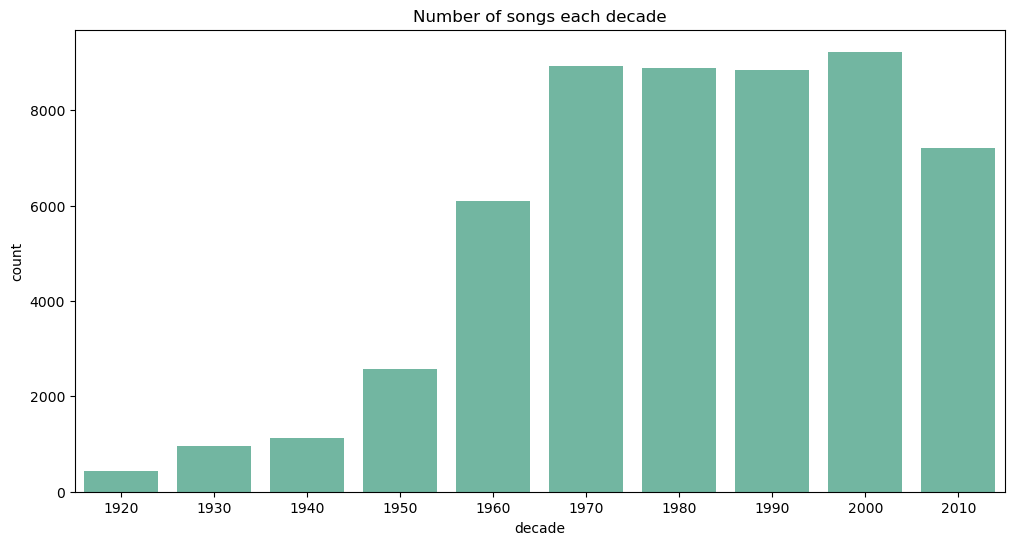

In [12]:
# plot the total number of songs each decade
plt.figure(figsize=(12,6))
sns.countplot(x='decade', data=dat)
plt.title('Number of songs each decade')
plt.show()

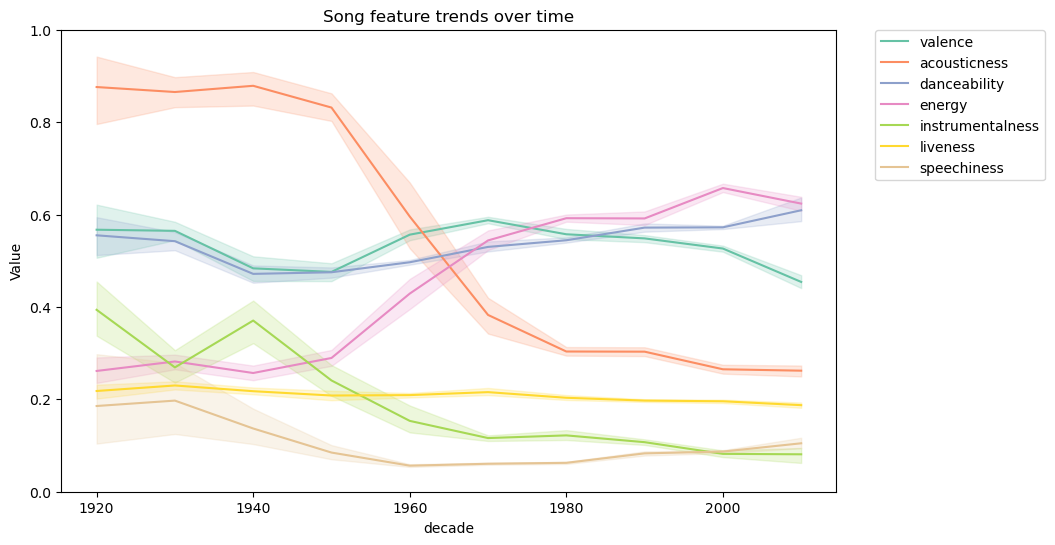

In [13]:
# how the song features change over time
plt.figure(figsize=(10, 6))
for feature in song_features_normalized:
    sns.lineplot(x='decade', y=feature, data=dat_year, label=feature)
plt.ylabel('Value')
plt.ylim(0, 1)
plt.title('Song feature trends over time')
# set legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

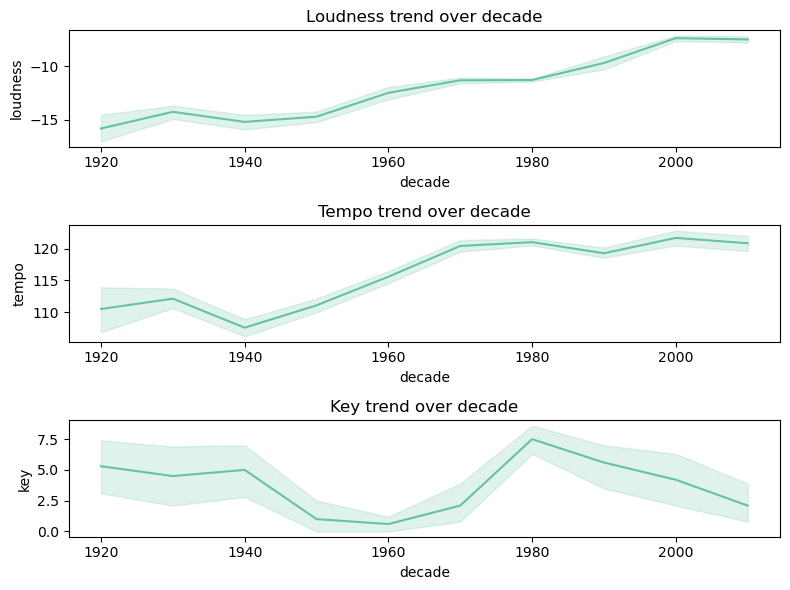

In [14]:
# plot the trends of loudness, tempo, key by year in subplots 
fig, axes = plt.subplots(3, 1, figsize=(8, 6))
sns.lineplot(x='decade', y='loudness', data=dat_year, ax=axes[0])
sns.lineplot(x='decade', y='tempo', data=dat_year, ax=axes[1])
sns.lineplot(x='decade', y='key', data=dat_year, ax=axes[2])
axes[0].set_title('Loudness trend over decade')
axes[1].set_title('Tempo trend over decade')
axes[2].set_title('Key trend over decade')
plt.tight_layout()
plt.show()

# EDA OF ARTISTS

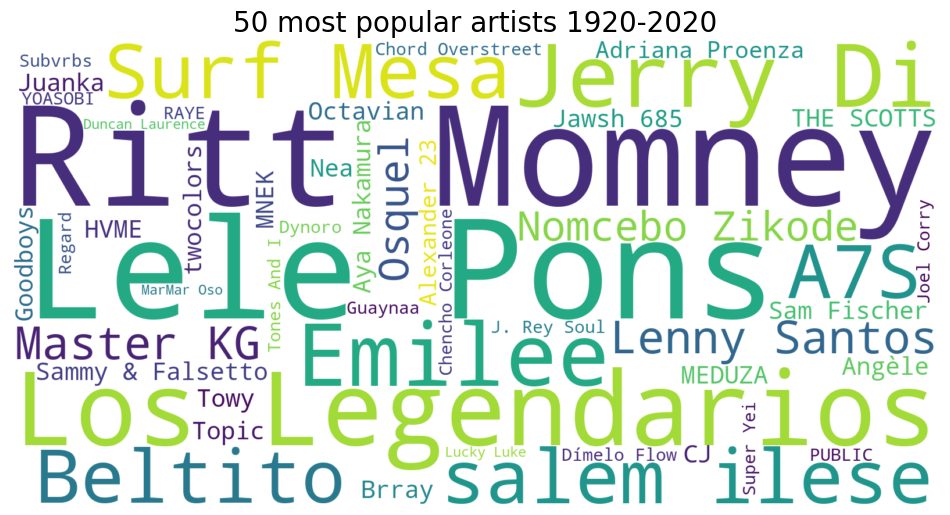

In [15]:
# plot a word cloud of the most popular artists over time
# create a dictionary of artist and their popularity
artist_popularity = dat_artist[['artists', 'popularity']].set_index('artists').to_dict()['popularity']
# sort the dictionary by value
artist_popularity = sorted(artist_popularity.items(), key=lambda x: x[1], reverse=True)

# create a word cloud
wordcloud = WordCloud(width=1600, height=800, max_words=50, background_color='white').generate_from_frequencies(dict(artist_popularity))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('50 most popular artists 1920-2020', fontsize=20)
plt.show()

In [16]:
# we can also check the most popular artists in each decade
# create a dictionary of artist and their popularity
artist_popularity_decade = dat.groupby(['decade', 'artists'])['popularity'].mean().reset_index()
artist_popularity_decade = artist_popularity_decade.sort_values(by=['decade', 'popularity'], ascending=False)
# # select the first artist in each decade
artist_popularity_decade = artist_popularity_decade.groupby('decade').head(1)
artist_popularity_decade

,decade,artists,popularity
14440,2010,"['24kGoldn', 'iann dior']",99.0
13462,2000,"['Shakira', 'Wyclef Jean']",83.0
8031,1990,"['Eminem', 'Dido']",78.0
5831,1980,['Katrina & The Waves'],78.0
3269,1970,"['Blue Swede', 'Björn Skifs']",75.0
2811,1960,"['The Beach Boys', 'Mark Linett', 'Sweet', 'La...",69.0
1254,1950,['Etta James'],50.0
902,1940,"['Rosemary Clooney', 'The Mellomen']",50.0
352,1930,"['Judy Garland', 'Billy Bletcher', 'The Munchk...",27.0
53,1920,"['Francisco Alves', 'Mario Reis']",30.0


# Analyzing features of our songs

In [17]:
# define song features
# features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']
song_featues = song_features_normalized + song_features_not_normalized
# standardize the features
scaler = StandardScaler()
feature_for_cluster = scaler.fit_transform(dat_genres[song_featues])

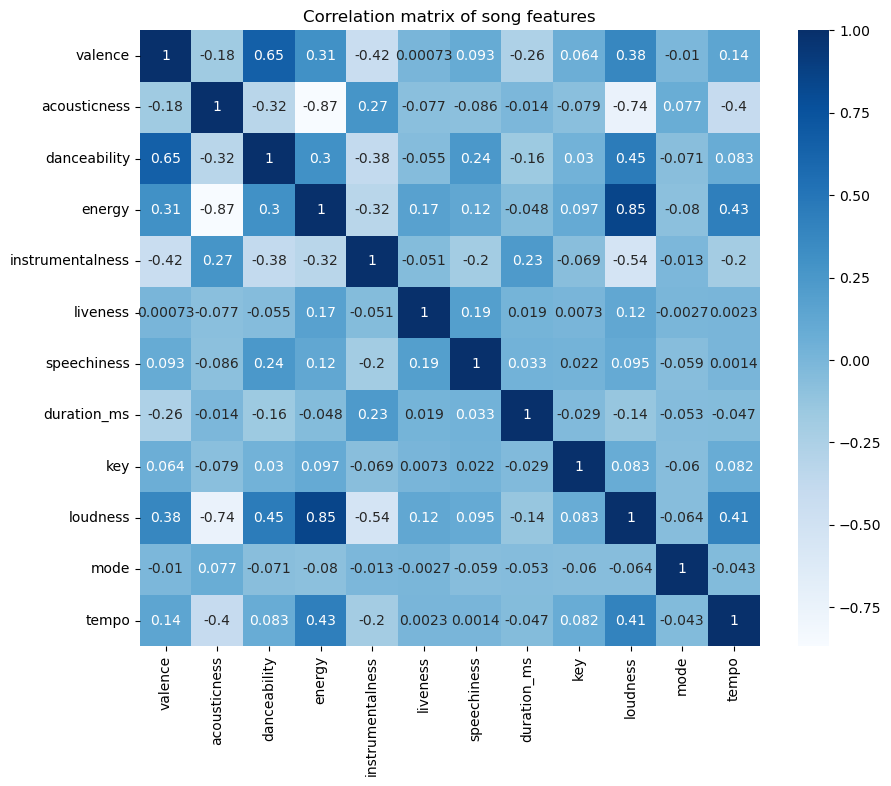

In [18]:
# make a correlation matrix of the song features
corr = np.corrcoef(feature_for_cluster.T)

# plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, 
            xticklabels=song_featues, yticklabels=song_featues, cmap='Blues')
plt.title('Correlation matrix of song features')
plt.show()

In [19]:
# using t-sne to reduce diemensionality to the standardized song features
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
feature_for_cluster_dim_redu = tsne.fit_transform(feature_for_cluster)

C:\Users\Deshmukh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Deshmukh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Deshmukh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Deshmukh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

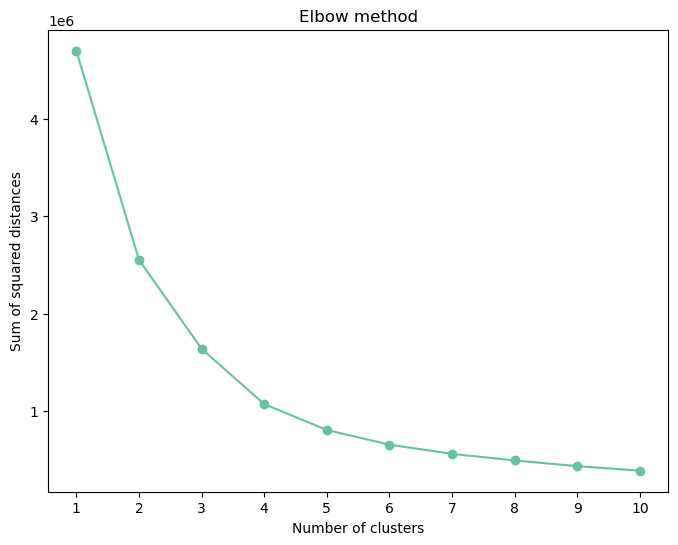

In [20]:
# use the elbow method to find the optimal number of clusters
# calculate the sum of squared distances for different number of cluster
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(feature_for_cluster_dim_redu)
    ssd.append(kmeans.inertia_)
# plot the sum of squared distances for different number of cluster
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), ssd, marker='o')
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method')
plt.show()

C:\Users\Deshmukh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


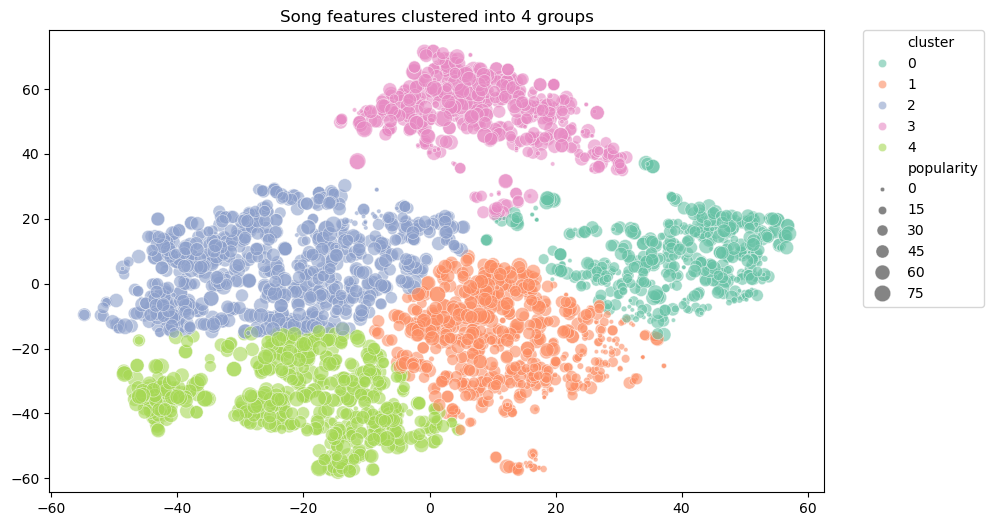

In [21]:
# cluster the features into 5 clusters using KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(feature_for_cluster_dim_redu)
# add the cluster labels to the dataset
dat_genres['cluster'] = kmeans.labels_

# plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature_for_cluster_dim_redu[:, 0], y=feature_for_cluster_dim_redu[:, 1], 
                hue=dat_genres['cluster'], palette='Set2', size=dat_genres['popularity'], sizes=(10, 150), alpha=0.6)
# set legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Song features clustered into 4 groups')
plt.show()

In [22]:
# with the clusters, we find the top 5 popular genres in each cluster
popular_genres = dat_genres.groupby('cluster')[['genres', 'popularity']].apply(lambda x: x.nlargest(5, columns=['popularity'])).reset_index()

for i in range(5):
    print(f"Cluster {i} : {popular_genres.query('cluster == @i')['genres'].tolist()}")


Cluster 0 : ['irish indie', 'lo-fi house', 'shush', 'white noise', 'lo-fi chill']
Cluster 1 : ['indie triste', 'guatemalan pop', 'rock chapin', 'chinese hip hop', 'modern indie pop']
Cluster 2 : ['circuit', 'guaracha', 'russian dance', 'trap chileno', 'japanese indie rock']
Cluster 3 : ['turkish edm', 'alberta hip hop', 'chinese electropop', 'afroswing', 'afro soul']
Cluster 4 : ['basshall', 'south african house', 'trap venezolano', 'trap triste', 'urbano espanol']


In [23]:
# calculate the distance between each genre and the cluster center
genre_cluster_center = []
for i in range(5):
    genre_cluster_center.append(dat_genres.query('cluster == @i')[song_featues].mean().values)
genre_cluster_center = np.array(genre_cluster_center)

# calculate the distance between each genre and the cluster center
genre_cluster_center_dist = []
for i in range(5):
    dist_array = np.linalg.norm(dat_genres.query('cluster == @i')[song_featues].values - genre_cluster_center[i], axis=1)
    genre_cluster_center_dist.append(dist_array)

# Convert the list of arrays into an array of objects
genre_cluster_center_dist = np.array(genre_cluster_center_dist, dtype=object)

# find the 5 most central genres in each cluster
central_genres = []
for i in range(5):
    central_genres.append(dat_genres.query('cluster == @i')['genres'].iloc[np.argsort(genre_cluster_center_dist[i])[:5]].tolist())

for i in range(5):
    print(f"Cluster {i} : {central_genres[i]}")

Cluster 0 : ['swedish synth', 'german jazz', 'hungarian classical performance', 'pibroch', 'wisconsin indie']
Cluster 1 : ['thai indie rock', 'jazz blues', 'celtic', 'vintage chinese pop', 'pop quebecois']
Cluster 2 : ['wonky', 'vancouver punk', 'canadian metal', 'uk dnb', 'liquid funk']
Cluster 3 : ['finnish alternative rock', 'deep uplifting trance', 'aussietronica', 'deep g funk', 'austropop']
Cluster 4 : ['musica alagoana', 'polynesian pop', 'k-rap', 'virginia hip hop', 'barbadian pop']


# EDA of Song popularity

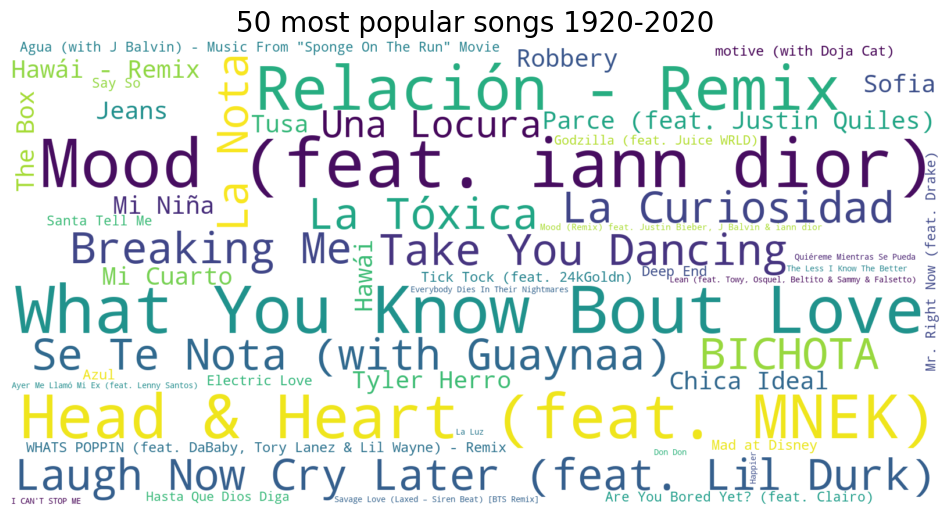

In [24]:
# plot a word cloud of the most popular songs over time
# create a dictionary of genre and their popularity
song_popularity = dat[['name', 'popularity']].set_index('name').to_dict()['popularity']
# sort the dictionary by value
song_popularity = sorted(song_popularity.items(), key=lambda x: x[1], reverse=True)

# create a word cloud
wordcloud = WordCloud(width=1600, height=800, max_words=50, background_color='white').generate_from_frequencies(dict(song_popularity))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('50 most popular songs 1920-2020', fontsize=20)
plt.show()

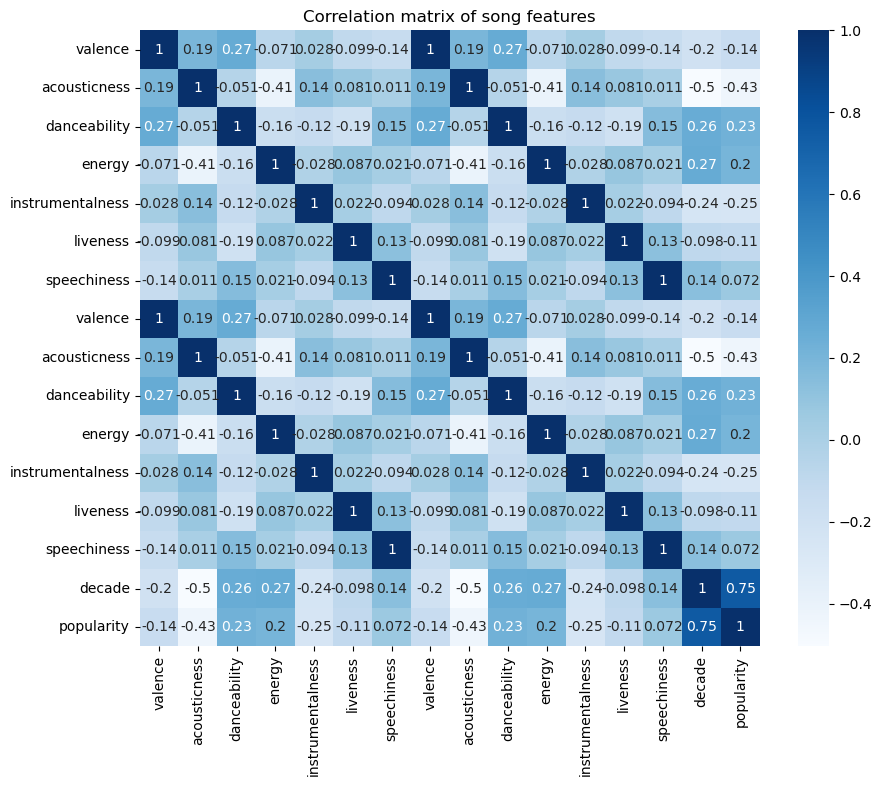

In [25]:
# make a correlation matrix of the song features, see what is more correlated with the popularity
all_features = song_features_normalized + song_features_normalized + ['decade', 'popularity']

# apply standardization to the features
scaler = StandardScaler()
feature_for_corr = scaler.fit_transform(dat[all_features])

# make a correlation matrix
corr = np.corrcoef(feature_for_corr.T)

# plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, xticklabels=all_features, yticklabels=all_features, cmap='Blues')
plt.title('Correlation matrix of song features')
plt.show()

In [26]:
# we can also check the most popular songs in each decade
# create a dictionary of artist and their popularity
song_popularity_decade = dat.groupby(['decade', 'name'])['popularity'].mean().reset_index()
song_popularity_decade = song_popularity_decade.sort_values(by=['decade', 'popularity'], ascending=False)
# # select the first artist in each decade
song_popularity_decade = song_popularity_decade.groupby('decade').head(1)
song_popularity_decade

,decade,name,popularity
46994,2010,Mood (feat. iann dior),99.0
37956,2000,"Hey, Soul Sister",83.0
31438,1990,Ms. Jackson,80.0
19164,1980,Billie Jean,83.0
10793,1970,Back In Black,84.0
6181,1960,Fortunate Son,81.0
3411,1950,Johnny B. Goode,75.0
1896,1940,Mambo Italiano (with The Mellomen) - 78rpm Ver...,50.0
742,1930,In the Mood - Live,52.0
113,1920,Fita Amarela,30.0


# Recommendation system

In [27]:
# build a recommendation system using the song features
# define the features to be used in the recommendation system

# features = song_features_normalized + song_features_not_normalized
features = song_features_normalized + song_features_not_normalized + ['decade', 'popularity']

# make a new dataframe, apply standardization to the features
scaler = StandardScaler()
feature_for_recommendation = scaler.fit_transform(dat[features])

# create a dataframe as a copy of the original dataframe and with the standardized features
dat_recommendation = dat.copy()
dat_recommendation[features] = feature_for_recommendation

# turn all song names into uppercase
dat_recommendation['name'] = dat_recommendation['name'].str.upper()

print(features)

['valence', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'duration_ms', 'key', 'loudness', 'mode', 'tempo', 'decade', 'popularity']


In [28]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# define a function to get feature vector of a given song
def get_feature_vector(song_name, year):
# def get_feature_vector(song_name, artist):
    dat_song = dat_recommendation.query('name == @song_name & year == @year')
    # dat_song = dat_recommendation.query('name == @song_name & artists == @artist')
    song_repeated = 0
    if dat_song.shape[0] == 0:
        raise Exception('The song does not exist in the dataset! \n Use search function first if you are not sure')
    if dat_song.shape[0] > 1:
        song_repeated = dat_song.shape[0]
        print(f'Warning: Multiple ({song_repeated}) songs with the same name and artist, the first one is selected!')
        dat_song = dat_song.head(1)
    feature_vector = dat_song[features].values
    return feature_vector, song_repeated
'''
# define a function to get the most similar songs
def get_similar_songs(song_name, year, top_n=10, plot_type='wordcloud'):
    feature_vector, song_repeated = get_feature_vector(song_name, year)

    # calculate the cosine similarity
    similarities = cosine_similarity(dat_recommendation[features].values, feature_vector).flatten()
    # similarities = euclidean_distances(dat_recommendation[features].values, feature_vector).flatten()

    # get the index of the top_n similar songs not including itself
    if song_repeated == 0:
        related_song_indices = similarities.argsort()[-(top_n+1):][::-1][1:]
    else:
        related_song_indices = similarities.argsort()[-(top_n+1+song_repeated):][::-1][1+song_repeated:]
        
    # get the name, artist, and year of the most similar songs
    similar_songs = dat_recommendation.iloc[related_song_indices][['name', 'artists', 'year']]
    
    if plot_type == 'wordcloud':
        # make a word cloud of the most similar songs and year, use the simalirity score as the size of the words
        similar_songs['name+year'] = similar_songs['name'] + ' (' + similar_songs['year'].astype(str) + ')'
        # create a dictionary of song and their similarity
        song_similarity = dict(zip(similar_songs['name+year'], similarities[related_song_indices]))
        # sort the dictionary by value
        song_similarity = sorted(song_similarity.items(), key=lambda x: x[1], reverse=True)
        # # create a mask for the word cloud
        # mask = np.array(Image.open("spotify-logo.png"))
        # create a word cloud
        wordcloud = WordCloud(width=1600, height=800, max_words=50, 
                            background_color='white', colormap='Set2').generate_from_frequencies(dict(song_similarity))
        plt.figure(figsize=(12,10))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'{top_n} most similar songs to: {song_name} ({year})', fontsize=20)
        plt.tight_layout(pad=0)
        plt.show()
    
    elif plot_type == 'bar':
        # plot the text of the most similar songs and year in order, like a stacked bar chart
        similar_songs['name+year'] = similar_songs['name'] + ' (' + similar_songs['year'].astype(str) + ')'
        # create a dictionary of song and their similarity
        song_similarity = dict(zip(similar_songs['name+year'], similarities[related_song_indices]))
        # sort the dictionary by value
        song_similarity = sorted(song_similarity.items(), key=lambda x: x[1], reverse=True)
        # plot the text of the most similar songs and year in order, like a stacked bar chart
        plt.figure(figsize=(12,10))
        plt.barh(range(len(song_similarity)), [val[1] for val in song_similarity], 
                 align='center', color=sns.color_palette('pastel', len(song_similarity)))
        plt.yticks(range(len(song_similarity)), [val[0] for val in song_similarity])
        plt.gca().invert_yaxis()
        plt.title(f'{top_n} most similar songs to: {song_name} ({year})', fontsize=20)
        min_similarity = min(similarities[related_song_indices])
        max_similarity = max(similarities[related_song_indices])
        # add song name on the top of each bar
        for i, v in enumerate([val[0] for val in song_similarity]):
            plt.text(min_similarity*0.955, i, v, color='black', fontsize=12)
        # plt.xlabel('Similarity', fontsize=15)
        # plt.ylabel('Song', fontsize=15)
        plt.xlim(min_similarity*0.95, max_similarity)
        # not show figure frame and ticks
        plt.box(False)
        plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, left=False, right=False, labelleft=False)
        
        plt.show()
    # return similar_songs
'''

# define a search function to search for a song and return its information
'''def search_song(song_name):
    dat_song = dat_recommendation.query('name == @song_name')
    if dat_song.shape[0] == 0:
        raise Exception('The song does not exist in the dataset!')
    print(f"Great! This song is in the dataset: {dat_song[['name', 'artists', 'release_date']].to_numpy()}")
    # return dat_song[['name', 'artists', 'year', 'release_date']]'''
'''def search_song(song_name):
    dat_song = dat_recommendation.query('name == @song_name')
    if dat_song.shape[0] == 0:
        raise Exception('The song does not exist in the dataset!')
    dat_song_info = dat_song[['name', 'artists', 'release_date']].to_numpy()
    release_year = dat_song['release_date'].values[0].split('-')[0]
    print(f"Great! This song is in the dataset: {dat_song_info}")
    return release_year'''

'def search_song(song_name):\n    dat_song = dat_recommendation.query(\'name == @song_name\')\n    if dat_song.shape[0] == 0:\n        raise Exception(\'The song does not exist in the dataset!\')\n    dat_song_info = dat_song[[\'name\', \'artists\', \'release_date\']].to_numpy()\n    release_year = dat_song[\'release_date\'].values[0].split(\'-\')[0]\n    print(f"Great! This song is in the dataset: {dat_song_info}")\n    return release_year'

In [29]:
# MOCK GET_SIMILAR_SONG FUNCTION 
def get_similar_songs(song_name, year, top_n=10, plot_type='wordcloud'):
    feature_vector, song_repeated = get_feature_vector(song_name, year)

    # calculate the cosine similarity
    similarities = cosine_similarity(dat_recommendation[features].values, feature_vector).flatten()
    # similarities = euclidean_distances(dat_recommendation[features].values, feature_vector).flatten()

    # get the index of the top_n similar songs not including itself
    if song_repeated == 0:
        related_song_indices = similarities.argsort()[-(top_n+1):][::-1][1:]
    else:
        related_song_indices = similarities.argsort()[-(top_n+1+song_repeated):][::-1][1+song_repeated:]
        
    # get the name, artist, and year of the most similar songs
    similar_songs = dat_recommendation.iloc[related_song_indices][['name', 'artists', 'year']]
    
    if plot_type == 'wordcloud':
        # make a word cloud of the most similar songs and year, use the simalirity score as the size of the words
        similar_songs['name+year'] = similar_songs['name'] + ' (' + similar_songs['year'].astype(str) + ')'
        # create a dictionary of song and their similarity
        song_similarity = dict(zip(similar_songs['name+year'], similarities[related_song_indices]))
        # sort the dictionary by value
        song_similarity = sorted(song_similarity.items(), key=lambda x: x[1], reverse=True)
        # # create a mask for the word cloud
        # mask = np.array(Image.open("spotify-logo.png"))
        # create a word cloud
        wordcloud = WordCloud(width=1600, height=800, max_words=50, 
                            background_color='white', colormap='Set2').generate_from_frequencies(dict(song_similarity))
        plt.figure(figsize=(12,10))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'{top_n} most similar songs to: {song_name} ({year})', fontsize=20)
        plt.tight_layout(pad=0)
        plt.show()
    
    elif plot_type == 'bar':
        # plot the text of the most similar songs and year in order, like a stacked bar chart
        similar_songs['name+year'] = similar_songs['name'] + ' (' + similar_songs['year'].astype(str) + ')'
        # create a dictionary of song and their similarity
        song_similarity = dict(zip(similar_songs['name+year'], similarities[related_song_indices]))
        # sort the dictionary by value
        song_similarity = sorted(song_similarity.items(), key=lambda x: x[1], reverse=True)
        # plot the text of the most similar songs and year in order, like a stacked bar chart
        plt.figure(figsize=(12,10))
        plt.barh(range(len(song_similarity)), [val[1] for val in song_similarity], 
                 align='center', color=sns.color_palette('pastel', len(song_similarity)))
        plt.yticks(range(len(song_similarity)), [val[0] for val in song_similarity])
        plt.gca().invert_yaxis()
        plt.title(f'{top_n} most similar songs to: {song_name} ({year})', fontsize=20)
        min_similarity = min(similarities[related_song_indices])
        max_similarity = max(similarities[related_song_indices])
        # add song name on the top of each bar
        for i, v in enumerate([val[0] for val in song_similarity]):
            plt.text(min_similarity*0.955, i, v, color='black', fontsize=12)
        # plt.xlabel('Similarity', fontsize=15)
        # plt.ylabel('Song', fontsize=15)
        plt.xlim(min_similarity*0.95, max_similarity)
        # not show figure frame and ticks
        plt.box(False)
        plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, left=False, right=False, labelleft=False)
        
        plt.show()

    return similar_songs
'''def search_song(song_name):
    dat_song = dat_recommendation.query('name == @song_name')
    if dat_song.shape[0] == 0:
        raise Exception('The song does not exist in the dataset!')
    dat_song_info = dat_song[['name', 'artists', 'release_date']].to_numpy()
    release_date = dat_song['release_date'].values[0]
    print(f"Release date: {release_date}")
    # Access the third element of the split date string to get the year
    release_year = release_date.split('-')[2]
    print(f"Great! This song is in the dataset: {dat_song_info}")
    return release_year'''
def search_song(song_name):
    dat_song = dat_recommendation.query('name == @song_name')
    if dat_song.shape[0] == 0:
        raise Exception('The song does not exist in the dataset!')
    dat_song_info = dat_song[['name', 'artists', 'release_date']].to_numpy()
    release_date = dat_song['release_date'].values[0]
    print(f"Release date: {release_date}")
    
    # Split the release date and check its length
    split_date = release_date.split('-')
    if len(split_date) == 3:
        release_year = split_date[2]
    else:
        raise ValueError(f"Unexpected date format for {release_date}")
    
    print(f"Great! This song is in the dataset: {dat_song_info}")
    return release_year

In [30]:
import random
random_name = dat_recommendation['name'].sample().values[0]
my_song = random_name
release_year = search_song(my_song)
#print(release_year[0])

Release date: 14-09-1999
Great! This song is in the dataset: [['GOLD SHINE (FEAT. THREE 6 MAFIA)' "['Project Pat', 'Three 6 Mafia']"
  '14-09-1999']]


In [31]:
print(release_year)

1999


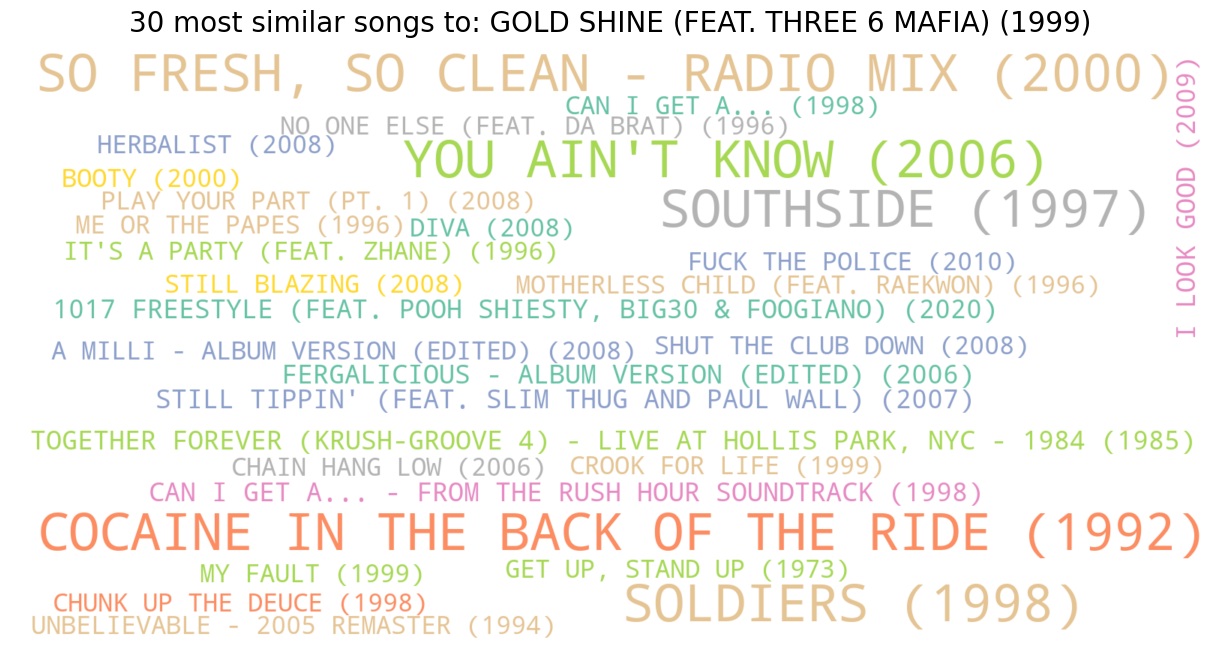

,name,artists,year,name+year
42135,COCAINE IN THE BACK OF THE RIDE,['UGK'],1992,COCAINE IN THE BACK OF THE RIDE (1992)
47540,SOLDIERS,"['C-Murder', 'Big Ed', 'Mac', 'Master P', 'Kan...",1998,SOLDIERS (1998)
10028,SOUTHSIDE,['Lil Keke'],1997,SOUTHSIDE (1997)
32490,"SO FRESH, SO CLEAN - RADIO MIX",['OutKast'],2000,"SO FRESH, SO CLEAN - RADIO MIX (2000)"
38229,YOU AIN'T KNOW,"['Birdman', 'Lil Wayne']",2006,YOU AIN'T KNOW (2006)
41574,TOGETHER FOREVER (KRUSH-GROOVE 4) - LIVE AT HO...,['Run–D.M.C.'],1985,TOGETHER FOREVER (KRUSH-GROOVE 4) - LIVE AT HO...
15955,CAN I GET A... - FROM THE RUSH HOUR SOUNDTRACK,"['JAY-Z', 'Amil', 'Ja Rule']",1998,CAN I GET A... - FROM THE RUSH HOUR SOUNDTRACK...
43336,FERGALICIOUS - ALBUM VERSION (EDITED),"['Fergie', 'will.i.am']",2006,FERGALICIOUS - ALBUM VERSION (EDITED) (2006)
44347,"1017 FREESTYLE (FEAT. POOH SHIESTY, BIG30 & FO...","['Gucci Mane', 'Pooh Shiesty', 'Foogiano', 'BI...",2020,"1017 FREESTYLE (FEAT. POOH SHIESTY, BIG30 & FO..."
16844,STILL TIPPIN' (FEAT. SLIM THUG AND PAUL WALL),"['Mike Jones', 'Paul Wall', 'Slim Thug']",2007,STILL TIPPIN' (FEAT. SLIM THUG AND PAUL WALL) ...


In [32]:
get_similar_songs(my_song, int(release_year), top_n=30, plot_type='wordcloud')

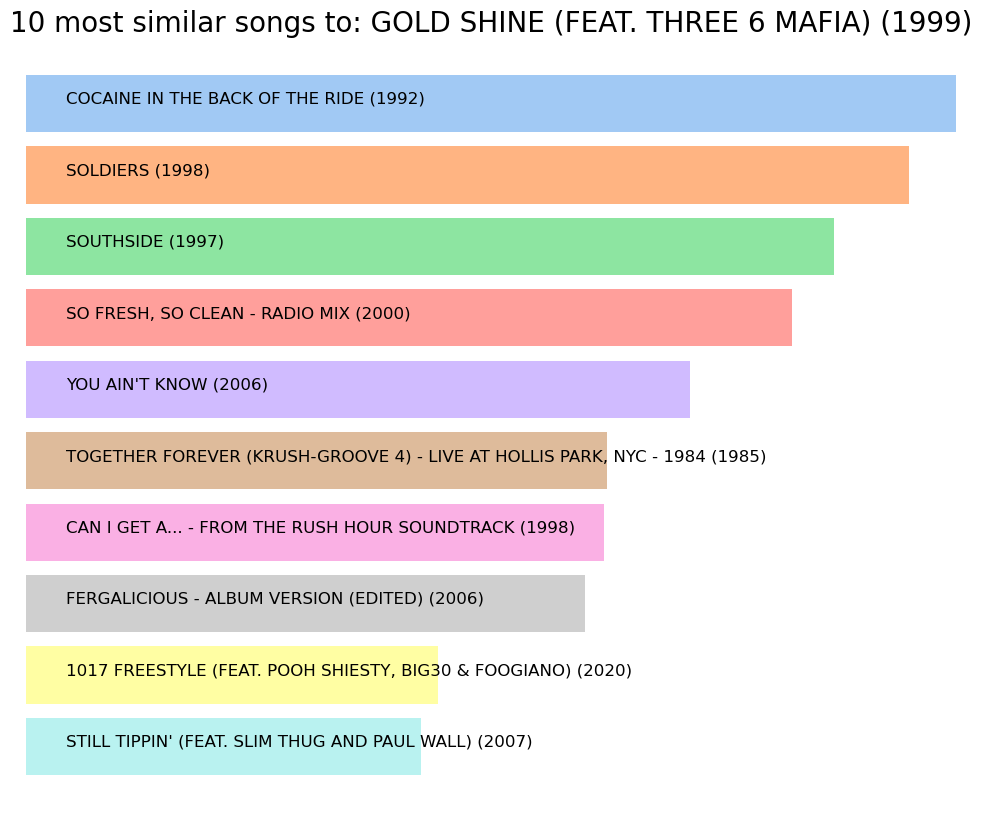

,name,artists,year,name+year
42135,COCAINE IN THE BACK OF THE RIDE,['UGK'],1992,COCAINE IN THE BACK OF THE RIDE (1992)
47540,SOLDIERS,"['C-Murder', 'Big Ed', 'Mac', 'Master P', 'Kan...",1998,SOLDIERS (1998)
10028,SOUTHSIDE,['Lil Keke'],1997,SOUTHSIDE (1997)
32490,"SO FRESH, SO CLEAN - RADIO MIX",['OutKast'],2000,"SO FRESH, SO CLEAN - RADIO MIX (2000)"
38229,YOU AIN'T KNOW,"['Birdman', 'Lil Wayne']",2006,YOU AIN'T KNOW (2006)
41574,TOGETHER FOREVER (KRUSH-GROOVE 4) - LIVE AT HO...,['Run–D.M.C.'],1985,TOGETHER FOREVER (KRUSH-GROOVE 4) - LIVE AT HO...
15955,CAN I GET A... - FROM THE RUSH HOUR SOUNDTRACK,"['JAY-Z', 'Amil', 'Ja Rule']",1998,CAN I GET A... - FROM THE RUSH HOUR SOUNDTRACK...
43336,FERGALICIOUS - ALBUM VERSION (EDITED),"['Fergie', 'will.i.am']",2006,FERGALICIOUS - ALBUM VERSION (EDITED) (2006)
44347,"1017 FREESTYLE (FEAT. POOH SHIESTY, BIG30 & FO...","['Gucci Mane', 'Pooh Shiesty', 'Foogiano', 'BI...",2020,"1017 FREESTYLE (FEAT. POOH SHIESTY, BIG30 & FO..."
16844,STILL TIPPIN' (FEAT. SLIM THUG AND PAUL WALL),"['Mike Jones', 'Paul Wall', 'Slim Thug']",2007,STILL TIPPIN' (FEAT. SLIM THUG AND PAUL WALL) ...


In [33]:
get_similar_songs(my_song, int(release_year), top_n=10, plot_type='bar')

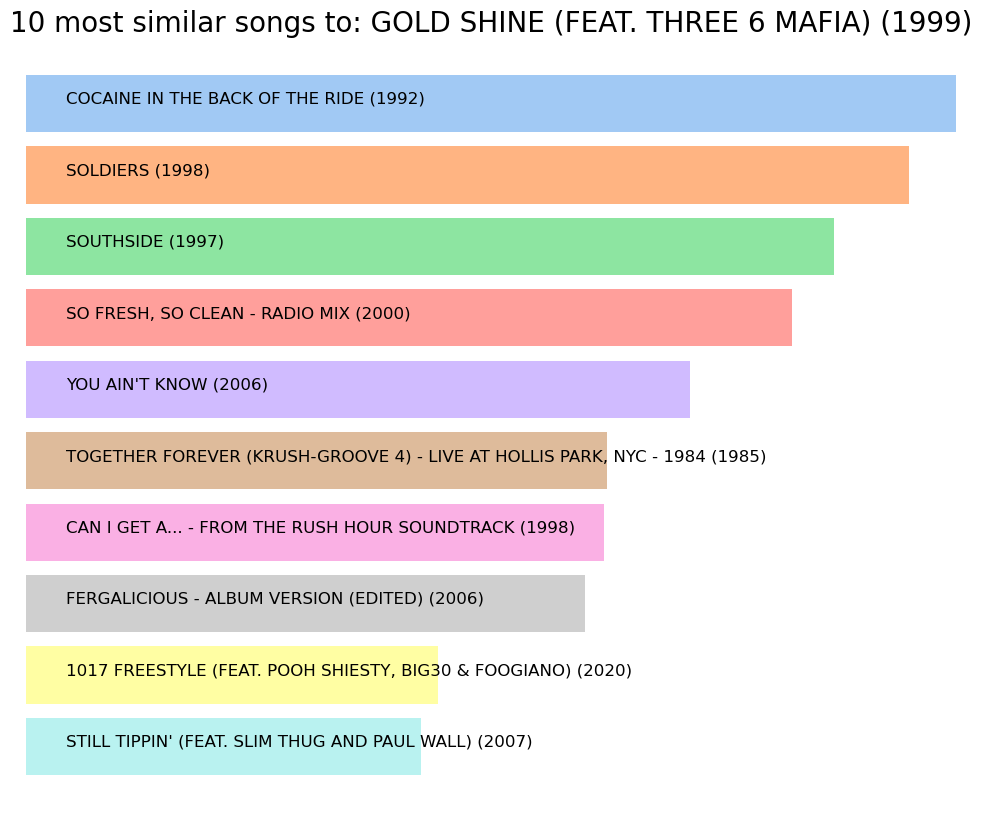

The similar songs are:
0: COCAINE IN THE BACK OF THE RIDE UGK 1992
1: SOLDIERS C-Murder, Big Ed, Mac, Master P, Kane & Abel, Silkk The Shocker, Mia X, Fiend, Mystikal 1998
2: SOUTHSIDE Lil Keke 1997
3: SO FRESH, SO CLEAN - RADIO MIX OutKast 2000
4: YOU AIN'T KNOW Birdman, Lil Wayne 2006
5: TOGETHER FOREVER (KRUSH-GROOVE 4) - LIVE AT HOLLIS PARK, NYC - 1984 Run–D.M.C. 1985
6: CAN I GET A... - FROM THE RUSH HOUR SOUNDTRACK JAY-Z, Amil, Ja Rule 1998
7: FERGALICIOUS - ALBUM VERSION (EDITED) Fergie, will.i.am 2006
8: 1017 FREESTYLE (FEAT. POOH SHIESTY, BIG30 & FOOGIANO) Gucci Mane, Pooh Shiesty, Foogiano, BIG30 2020
9: STILL TIPPIN' (FEAT. SLIM THUG AND PAUL WALL) Mike Jones, Paul Wall, Slim Thug 2007


In [34]:
import ast

# Usage
similar_songs_list = get_similar_songs(my_song, int(release_year), top_n=10, plot_type='bar')

'''# Loop through the similar songs and format the information
formatted_songs = []
for index, row in similar_songs_list.iterrows():
    song_name = row['name']
    # Convert the string representation of the list to an actual list
    artist_list = ast.literal_eval(row['artists'])
    # Join the list into a single string
    artists = ', '.join(artist_list)
    year = row['year']
    # Create a single variable to hold the information
    song_info = f"{song_name} {artists} {year}"
    formatted_songs.append(song_info)

print("The similar song is")
i = -1
for song_info in formatted_songs:
    i += 1
    print(f"{i}: {song_info}")
    '''
formatted_songs = []
for index, row in similar_songs_list.iterrows():
    song_name = row['name']
    # Convert the string representation of the list to an actual list
    artist_list = ast.literal_eval(row['artists'])
    # Join the list into a single string
    artists = ', '.join(artist_list)
    year = row['year']
    # Create a single variable to hold the information
    song_info = f"{song_name} {artists} {year}"
    formatted_songs.append(song_info)

print("The similar songs are:")
i = -1
for song_info in formatted_songs:
    i += 1
    print(f"{i}: {song_info}")

In [35]:
formatted_songs_list = []

# Store the formatted strings in a list
for i, song_info in enumerate(formatted_songs, start=0):
    formatted_songs_list.append(f"{i}: {song_info}")

# Print the list of formatted strings
for song_info in formatted_songs_list:
    print(song_info)

0: COCAINE IN THE BACK OF THE RIDE UGK 1992
1: SOLDIERS C-Murder, Big Ed, Mac, Master P, Kane & Abel, Silkk The Shocker, Mia X, Fiend, Mystikal 1998
2: SOUTHSIDE Lil Keke 1997
3: SO FRESH, SO CLEAN - RADIO MIX OutKast 2000
4: YOU AIN'T KNOW Birdman, Lil Wayne 2006
5: TOGETHER FOREVER (KRUSH-GROOVE 4) - LIVE AT HOLLIS PARK, NYC - 1984 Run–D.M.C. 1985
6: CAN I GET A... - FROM THE RUSH HOUR SOUNDTRACK JAY-Z, Amil, Ja Rule 1998
7: FERGALICIOUS - ALBUM VERSION (EDITED) Fergie, will.i.am 2006
8: 1017 FREESTYLE (FEAT. POOH SHIESTY, BIG30 & FOOGIANO) Gucci Mane, Pooh Shiesty, Foogiano, BIG30 2020
9: STILL TIPPIN' (FEAT. SLIM THUG AND PAUL WALL) Mike Jones, Paul Wall, Slim Thug 2007


In [36]:
print(formatted_songs_list[1])

1: SOLDIERS C-Murder, Big Ed, Mac, Master P, Kane & Abel, Silkk The Shocker, Mia X, Fiend, Mystikal 1998


In [37]:
import tkinter as tk
from tkinter import *
import os 
import pyautogui
import time

canvas = tk.Tk()
canvas.title("Music player")
canvas.config(bg='#e9dffc')


label = tk.Label(canvas, text='DY PATIL UNIVERSITY', bg='#e7ddf9', font = ('Microsoft Sans Serif',14))
label.pack()
label = tk.Label(canvas, text='PROJECT TITLE: SONG RECOMMENDATION USING MACHINE LEARNING', bg='#e7ddf9', font = ('Microsoft Sans Serif',14))
label.pack()


label = tk.Label(canvas, text='List of similar songs: ', bg='#e7ddf9', font = ('Microsoft Sans Serif',12))
label.pack(padx = 10, pady = 10, side = TOP,anchor="w")

listBox = tk.Listbox(canvas, fg='black', bg='#f3eefc',width=100, font=('Candara', 14))
listBox.pack(padx=15, pady=15)

top = tk.Frame(canvas, bg='#2b007a')
top.pack(padx=10, pady=5, anchor='center')

for i in range (10):
    wp = formatted_songs_list[i]
    listBox.insert('end',wp)

Label(canvas, text="Enter Song number to be played (0-9):").pack()


Fname = Entry(canvas)


Fname.pack(pady=15,padx = 15)


def getInput():

    a = Fname.get()
    canvas.destroy()

    global params
    params = [a]

Button(canvas, text="submit",
       command=getInput,bg = '#894dfa').pack()

canvas.mainloop()
listBox.mainloop()
print(params)
string = "".join(params)
convst = int(string)
print(formatted_songs_list[convst])
wp = formatted_songs_list[convst]
print(wp)

os.startfile(r'C:\Users\Deshmukh\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Spotify')
time.sleep(7)
pyautogui.hotkey('ctrl','l')
pyautogui.write(wp[2:], interval = 0.1)

for key in ['enter', 'pagedown','tab', 'enter', 'enter']:
    time.sleep(3)
    pyautogui.press(key)

['0']
0: COCAINE IN THE BACK OF THE RIDE UGK 1992
0: COCAINE IN THE BACK OF THE RIDE UGK 1992


In [38]:
wp[2:]

' COCAINE IN THE BACK OF THE RIDE UGK 1992'